In [12]:
from build.sabre import CouplingCircuit
from build.sabre import Backend as Backend_cpp
from build.sabre import Model as Model_cpp
from build.sabre import SabreLayout as SabreLayout_cpp 
from build.sabre import SabreRouting as SabreRouting_cpp
from build.sabre import DAGCircuit as DAGCircuit_cpp
from build.sabre import CouplingCircuit as CouplingCircuit_cpp
from build.sabre import InstructionNode as InstructionNode_cpp
from build.sabre import Layout as Layout_cpp

from utils import cppDag_to_dag, cppNode_to_node, node_to_cppNode

import numpy as np
import time

import sys
sys.path.append("/Users/air/workspace/qusteed")
from qusteed.dag.dag_circuit import DAGCircuit
from qusteed.passes.mapping.routing.sabre_routing import SabreRouting
from qusteed.passes.model import Model
from qusteed.backends.backend import Backend
from qusteed.passes.datadict import DataDict
from qusteed.dag.circuit_dag  import circuit_to_dag, dag_to_circuit, draw_dag
from qusteed.dag.instruction_node import InstructionNode 
from qusteed.graph.couplinggraph import CouplingGraph
from qusteed.utils.random_circuit import RandomCircuit 

from main import *



%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


a [1, 2] [1.2200000286102295] 0 s


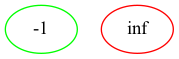

In [13]:
dag_cpp = DAGCircuit_cpp()

# node = InstructionNode_cpp("a", [1,2])
# node.paras = [1.22]
# dag_cpp.add_instruction_node_end(node)

node = InstructionNode(name="a", pos=[1,2], paras=[1.22], duration=0, unit="s", label=1)
node_cpp = node_to_cppNode(node)
print(node_cpp.name, node_cpp.qubit_pos, node_cpp.paras, node_cpp.duration, node_cpp.unit)
node = cppNode_to_node(node_cpp, 1)



dag = cppDag_to_dag(dag_cpp)

draw_dag(dag)


In [14]:
c_circuit, c_circuit_cpp = test_coupling()

model = get_preset_model()

qc = get_random_qc()
dag = circuit_to_dag(qc)
# draw_dag(dag)

dag_cpp = dag_to_cppDag(dag)
#dag_cpp.draw_self()

Backend Created
Model with backend created


In [15]:
print("---- python ----")
sabre_routing = SabreRouting()
sabre_routing.modify_dag = True
sabre_routing.set_model(model)
st = time.time()
res = sabre_routing.run(dag)
print(f"python-time: {time.time()-st}")
# draw_dag(res)


---- python ----
python-time: 1.4008889198303223


In [16]:
print("----  c++   ----")
model_cpp = Model_cpp() 
model_cpp.init_layout =  Layout_cpp(sabre_routing.model._layout["initial_layout"].v2p)
sabre_routing_cpp = SabreRouting_cpp(c_circuit_cpp)
sabre_routing_cpp.modify_dag = True
sabre_routing_cpp.set_model(model_cpp)
st = time.time()
mapped_dag_cpp = sabre_routing_cpp.run(dag_cpp)
print(f"cpp-time: {time.time()-st}")
# mapped_dag_cpp.draw_self()
# dag_cpp.print_self()

----  c++   ----
cpp-time: 0.034087181091308594


In [17]:
# mapped_dag_cpp.draw_self()
res_cpp = cppDag_to_dag(mapped_dag_cpp)

In [18]:
measures = [x for x in range(4)]
cbits = [x for x in range(4)]


qc = dag_to_circuit(res, 4)
qc.measure(measures,  cbits=cbits)


qc_cpp = dag_to_circuit(res_cpp, 4)
qc_cpp.measure(measures,  cbits=cbits)

In [19]:
from quafu import simulate



# simu_res = simulate(qc, output="probabilities")
# simu_res.plot_probabilities()
simu_res = simulate(qc, output="state_vector")
simu_res.get_statevector()


array([-0.22099458-0.31006305j,  0.05606627-0.26111579j,
       -0.20706603-0.05254538j, -0.01812453-0.15879904j,
        0.25259876-0.03488522j,  0.38930387-0.09753746j,
        0.16213916+0.00263198j, -0.05578351+0.12091928j,
       -0.19685542+0.22223702j,  0.12643942-0.09945863j,
       -0.06994368-0.03369152j, -0.29290769-0.08396025j,
       -0.15559607+0.15697676j,  0.14454939-0.27078244j,
       -0.2044296 -0.16905571j, -0.01169008-0.12618131j])

In [ ]:
qc.plot_circuit()

In [21]:
from quafu import simulate



# simu_res = simulate(qc_cpp, output="")
# simu_res.plot_probabilities()
simu_res = simulate(qc_cpp, output="state_vector")
simu_res.get_statevector()

array([-0.22099466-0.31006338j, -0.19685498+0.22223663j,
        0.25259852-0.03488521j, -0.1555956 +0.156977j  ,
       -0.20706521-0.05254549j, -0.06994393-0.03369173j,
        0.16213926+0.00263182j, -0.20442962-0.1690556j ,
        0.05606656-0.26111593j,  0.12644002-0.09945943j,
        0.38930389-0.09753715j,  0.14454917-0.27078288j,
       -0.01812422-0.15879903j, -0.29290765-0.08396007j,
       -0.05578324+0.12091921j, -0.01169131-0.12618177j])

In [22]:
qc_cpp.plot_circuit()

Error in callback <function _draw_all_if_interactive at 0x128726a70> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 390866x472 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 390866x472 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 390866x472.441 with 1 Axes>